# Movie Review Classification 

In [1]:
import numpy as np
import pandas as pd
import cleantext as cln
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve as rc
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import (
   confusion_matrix, classification_report , accuracy_score )



## 1. Reading data

In [2]:
data = pd.read_csv("Train.csv")

In [3]:
data.head()


,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [4]:
data.shape

(40000, 2)

## 2. Data Preporcessing and Exploratory analysis

In [5]:
data.duplicated().sum()


280

In [6]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [7]:
classdf = data.groupby('label').nunique()
classdf

,review
label,
neg,19783
pos,19937


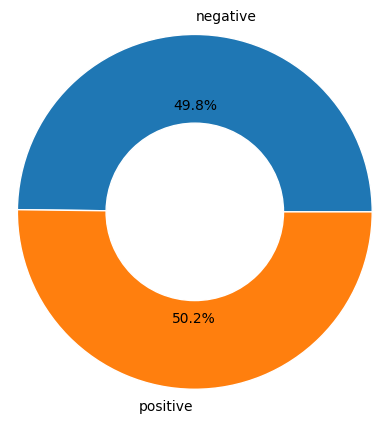

In [8]:
per_class = classdf.review
mypie,_,_ = plt.pie(per_class, radius= 1.2, labels= ['negative', 'positive'] , autopct= '%.1f%%')
plt.setp(mypie, width = 0.6, edgecolor = 'white')
plt.show()

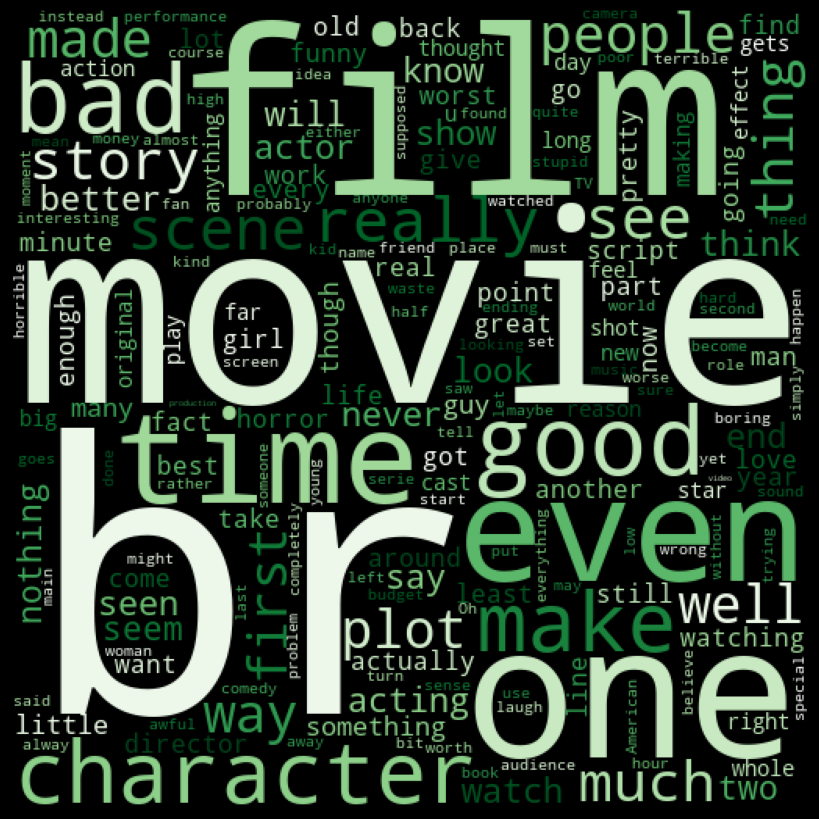

In [9]:
negative_words = ' '.join(list(data[data['label']== 'neg']['review']))
negative_wc =  WordCloud(width = 512 , height= 512 , collocations=False , colormap= 'Greens').generate(negative_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(negative_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

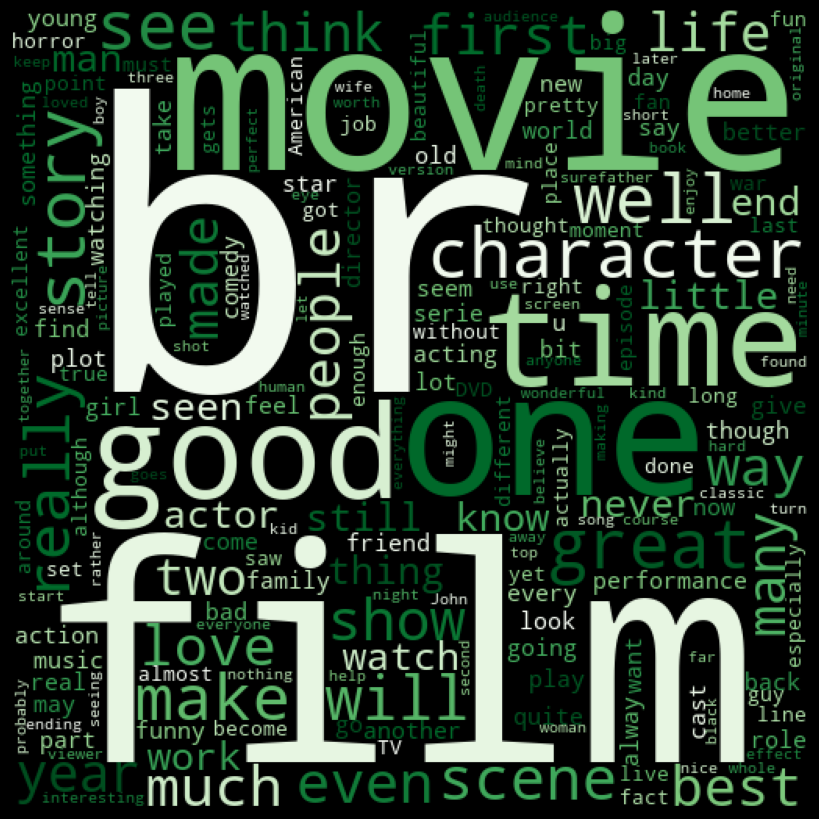

In [10]:
positive_words = ' '.join(list(data[data['label']== 'pos']['review']))
positive_wc =  WordCloud(width = 512 , height= 512 , collocations=False , colormap= 'Greens').generate(positive_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

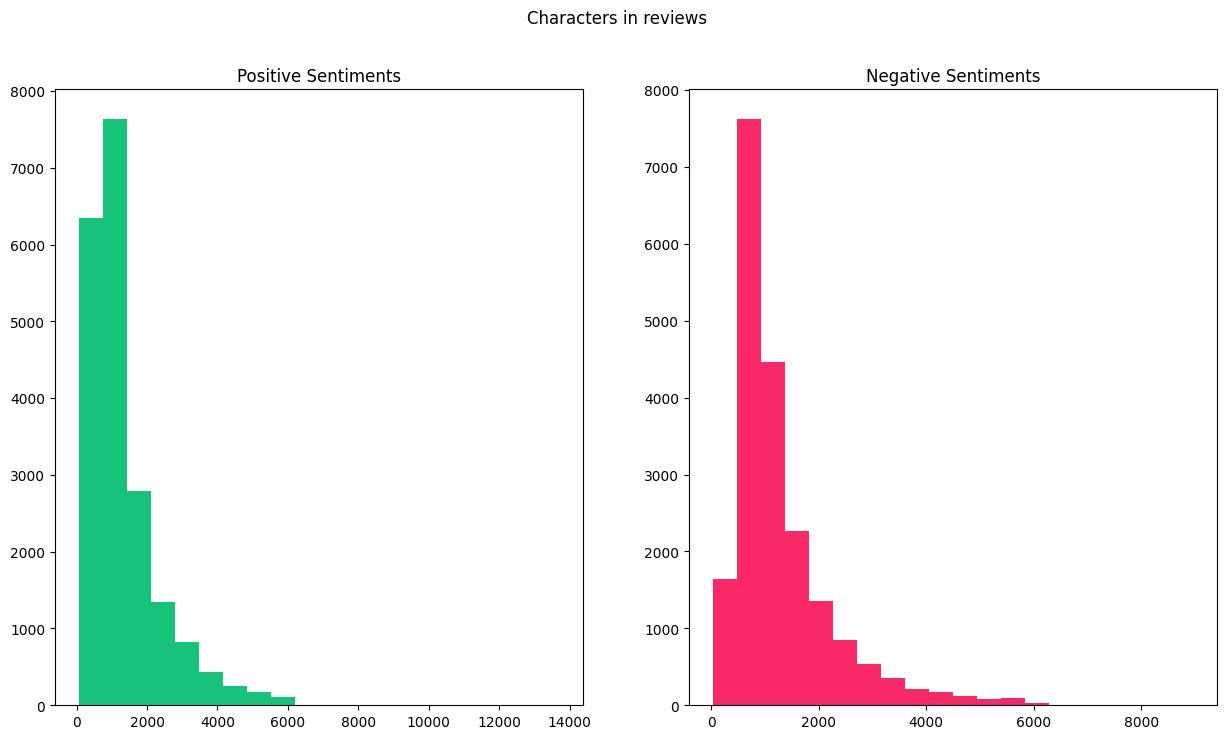

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
review_len=data[data['label']=='pos']['review'].str.len()
ax1.hist(review_len,color='#17C37B' , bins= 20)
ax1.set_title('Positive Sentiments')

review_len=data[data['label']=='neg']['review'].str.len()
ax2.hist(review_len,color='#F92969' , bins= 20)
ax2.set_title('Negative Sentiments')

fig.suptitle('Characters in reviews')
plt.show()

In [13]:
X = data['review']
Y = data['label']

X

0        mature intelligent and highly charged melodram...
1        http://video.google.com/videoplay?docid=211772...
2        Title: Opera (1987) Director: Dario Argento Ca...
3        I think a lot of people just wrote this off as...
4        This is a story of two dogs and a cat looking ...
                               ...                        
39995    There are similarities between Ray Lawrence's ...
39996    For starters, I once met the director when he ...
39997    Much of "Over Her Dead Body" is so painfully u...
39998    "Lifeforce" is a truly bizarre adaptation of t...
39999    I saw this movie at a screener and its the bes...
Name: review, Length: 39720, dtype: object

## 3. Parsing data in nlp pipline for Cleaning, Tokenization, removing Stopwords, Stemming

In [14]:
# cln is a module written as nlp pipline
cleaned_X = [cln.getcleanedReview(i) for i in X]

C:\Users\Dell\OneDrive\Documents\CB Data Science\5.naivebayes\cleantext.py:51: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review, "lxml").text


In [15]:
cleaned_x = np.array(cleaned_X)
cleaned_x

array(['matur intellig highli charg melorama unbelivebl film china wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
       'istribut triew opt mass appealw want best possibl view rang forgo profit continu manual labor job glali entertain work yoursview texa tale pleas write like like alex like stuie texa texa tale write ityour opinion rule',
       'titl opera irector ario argento cast cristina masillach ian charleson urbano barberini aria nicoloi review argento movi ha seen suspiria one blew away style color spooki stori line next eci go opera ha tol one best man think im iscov ultim one favorit horror irectorsopera young opera singer get big break main star creepi moern opera take mc beth get hit car betti unerstuy get part ba there psycho make watch brutal murer frien coworkerswow hear goo thing flick wasnt prepar level great film woul take yeah movi shortcom ill get later part movi blew awayfirst movi fill lot color suspiria expect bit like su

In [16]:
# function to get most frequent words from the data


def freqword(x):

    
    cnt_test = Counter()

    for text in x:
        for word in text.split():
            cnt_test[word] += 1

    return cnt_test.most_common(10)

In [17]:
#function to remove the frequent words

def removefreq(text, freq):
    return " ".join([word for word in str(text).split() if word not in freq])

In [18]:

freq_xtrain = freqword(cleaned_x)
freq = set([w for (w, wc ) in freq_xtrain])

cleaned_x= [removefreq(i, freq) for i in cleaned_x]


In [19]:
cleaned_x = np.array(cleaned_x)

<BarContainer object of 10 artists>

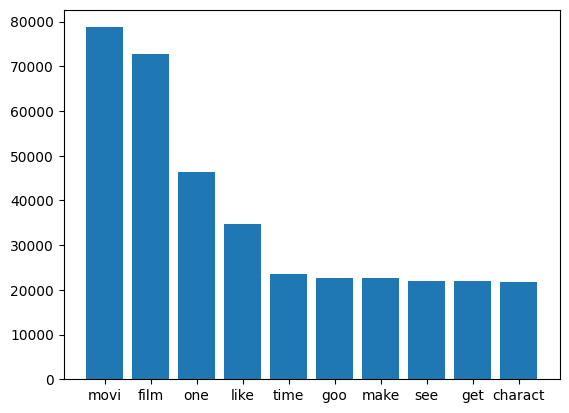

In [20]:
#words that are removed
freq_x = pd.DataFrame(freq_xtrain, columns=['words', 'counts'])
plt.bar(x = freq_x['words'], height = freq_x['counts'])

In [21]:
freq_x

,words,counts
0,movi,78715
1,film,72791
2,one,46307
3,like,34711
4,time,23652
5,goo,22672
6,make,22663
7,see,22053
8,get,21963
9,charact,21668


## 4. label Encoding for Target values

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

## 5. Splitting the Data

In [23]:
xtrain , xtest , ytrain, ytest = train_test_split(cleaned_x, Y , test_size= 0.2 , random_state= 42)

In [24]:
print(xtrain.shape)
print(ytest.shape)

(31776,)
(7944,)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score


## 6.Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [27]:
# for bag of words
cvt = CountVectorizer()
cv_train = cvt.fit_transform(xtrain)
cv_test = cvt.transform(xtest).toarray()
print('Countvectorizer train shape: ', cv_train.shape)
print('Countvectorizer test shape: ' , cv_test.shape)

Countvectorizer train shape:  (31776, 128140)
Countvectorizer test shape:  (7944, 128140)


In [28]:
# tfidf vectorizer
tv = TfidfVectorizer()
tv_train = tv.fit_transform(xtrain)
tv_test = tv.transform(xtest)
print('Tfidf_train:',tv_train.shape)
print('Tfidf_test:',tv_test.shape)

Tfidf_train: (31776, 128140)
Tfidf_test: (7944, 128140)


## 7. MultinomialNB model

In [29]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [30]:
mnb.fit(cv_train, ytrain)
cv_pred = mnb.predict(cv_test)

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
def report(ytrue, ypred):
    con = confusion_matrix(y_true= ytest, y_pred= ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix= con)
    disp.plot()
    plt.show()
    
    print("\n Classificaton Report : \n" ,classification_report(ytest ,ypred))
    print("\n accuracy_score: ", accuracy_score(ytrue, ypred))
    
    fpr, tpr, _ = rc(ytest,  cv_pred)

     #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()

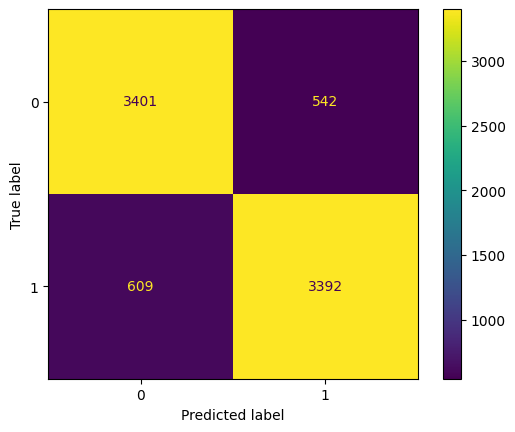


 Classificaton Report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      3943
           1       0.86      0.85      0.85      4001

    accuracy                           0.86      7944
   macro avg       0.86      0.86      0.86      7944
weighted avg       0.86      0.86      0.86      7944


 accuracy_score:  0.855110775427996


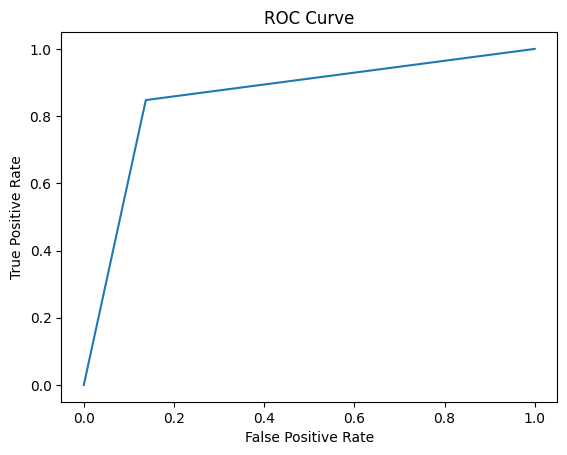

In [33]:
report(ytest , cv_pred)

In [34]:
mnb.fit(tv_train, ytrain)
tv_pred = mnb.predict(tv_test)

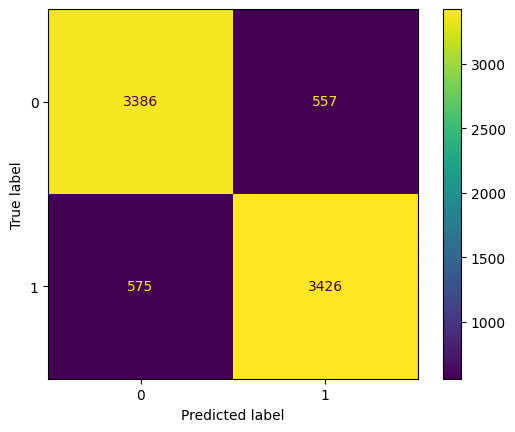


 Classificaton Report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      3943
           1       0.86      0.86      0.86      4001

    accuracy                           0.86      7944
   macro avg       0.86      0.86      0.86      7944
weighted avg       0.86      0.86      0.86      7944


 accuracy_score:  0.8575025176233635


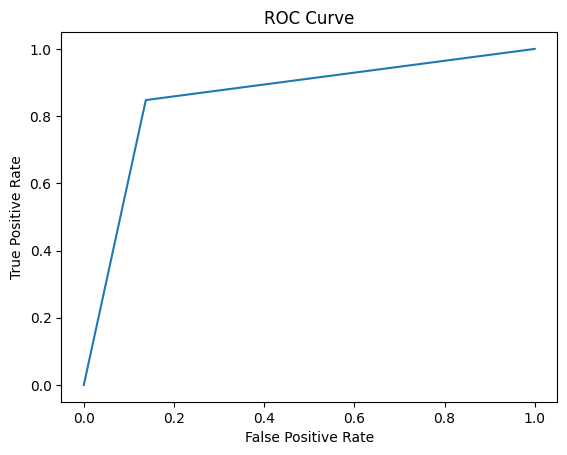

In [35]:
report(ytest, tv_pred)